# Workshop: Exploring Global Topography, Plate Tectonics, Seismicity, and Volcanism

---  
## 1. Objectives

The objecive is to make a map of the Earth showing the global distribution of tectonic plates, volcanoes, and earthquakes.

The purpose is to learn something about the geosciences in parallel with developing data skills.


---
## 2. Data sources

The data sources for this map are:

### 2.1 Global Plate Boundaries

The digital data are provided by [Fraxen GitHub](https://github.com/fraxen/tectonicplates) based on the model described in [Bird 2003](http://peterbird.name/publications/2003_PB2002/2001GC000252.pdf).

### 2.2 Smithsonian Institution Global Volcanism Program

The Global Volcanism Program database currently contains 1422 volcanoes with eruptions during the Holocene period (approximately the last 10,000 years). The database can be downloaded here 

Holocene

https://volcano.si.edu/database/list_volcano_holocene_excel.cfm

[https://volcano.si.edu/list_volcano_holocene.cfm](https://volcano.si.edu/list_volcano_holocene.cfm).

Pleistocene 

[https://volcano.si.edu/list_volcano_pleistocene.cfm](https://volcano.si.edu/list_volcano_pleistocene.cfm)

Global Volcanism Program, 2013. Volcanoes of the World, v. 4.9.0. Venzke, E (ed.). Smithsonian Institution. Downloaded 21 Jun 2020. https://doi.org/10.5479/si.GVP.VOTW4-2013

Global Volcanism Program, 2013. Volcanoes of the World, v. 4.10.1. Venzke, E (ed.). Smithsonian Institution. Downloaded 8 Aug 2021. https://doi.org/10.5479/si.GVP.VOTW4-2013

### 2.3 Global Earthquake Epicenters from the United States Geological Survey (USGS)

[API Documentation]('https://earthquake.usgs.gov/fdsnws/event/1/')


---
## 3. Getting started

Import required modules.

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio 
import pandas as pd
import numpy as np

import json
from flatten_geojson import flatten_geojson

Set the default renderer and template.

In [2]:
pio.renderers.default = 'png'
pio.templates.default = 'plotly_dark'

Read the mapbox access token from file.

In [14]:
with open('./mapbox-access-token.txt') as f:
    token = f.read()

---
### Read Global Tectonic Plates data

In [15]:
#
# load global tectonic plates from (.json) file:
#
with open('./data/plates/GeoJSON/PB2002_plates.json','r') as f:
    plates = json.load(f)

#
# load orogens data from (.json) file:
#
with open('./data/plates/GeoJSON/PB2002_orogens.json','r') as f:
    orogens = json.load(f)

df_plates = flatten_geojson(plates)
df_orogens = flatten_geojson(orogens)

Examples of using list comprehensions to pick apart the plates and orogens nested data structures.

In [16]:
[feature['properties']['PlateName'] for feature in plates['features']]

['Africa',
 'Antarctica',
 'Somalia',
 'India',
 'Australia',
 'Eurasia',
 'North America',
 'South America',
 'Nazca',
 'Pacific',
 'Arabia',
 'Sunda',
 'Timor',
 'Kermadec',
 'Kermadec',
 'Tonga',
 "Niuafo'ou",
 'Woodlark',
 'Maoke',
 'South Bismarck',
 'Solomon Sea',
 'North Bismarck',
 'New Hebrides',
 'Caribbean',
 'Cocos',
 'Okhotsk',
 'Juan de Fuca',
 'Altiplano',
 'North Andes',
 'Okinawa',
 'Philippine Sea',
 'Amur',
 'Caroline',
 'Mariana',
 'Futuna',
 'Scotia',
 'Shetland',
 'Aegean Sea',
 'Anatolia',
 'Yangtze',
 'Burma',
 'Rivera',
 'Birds Head',
 'Molucca Sea',
 'Banda Sea',
 'Manus',
 'Conway Reef',
 'Balmoral Reef',
 'Balmoral Reef',
 'Easter',
 'Juan Fernandez',
 'Galapagos',
 'Sandwich',
 'Panama']

Get the properties of the North Bismarck plate.

In [ ]:
[feature['properties'] for feature in plates['features'] if feature['properties']['PlateName'] == 'North Bismarck']

Now get the geometry of North Bismarck, down to the level of the `coordinates` lists. 

In [ ]:
[feature['geometry']['coordinates'] for feature in plates['features'] if feature['properties']['PlateName'] == 'North Bismarck']

Let's see the first few records of the plates data.

In [ ]:
df_plates.head()

And the first few rows of the orogens data.

In [ ]:
df_orogens.head()

---
### Read Global Volcanism Program data

In [3]:
df_volcanoes = pd.read_csv('./data/volcanoes/GVP_Volcano_List_Holocene.csv')
df_volcanoes['Period'] = 'Holocene'
df_volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Volcano Number        1398 non-null   int64  
 1   Volcano Name          1398 non-null   object 
 2   Country               1398 non-null   object 
 3   Primary Volcano Type  1398 non-null   object 
 4   Activity Evidence     1398 non-null   object 
 5   Last Known Eruption   1398 non-null   object 
 6   Region                1398 non-null   object 
 7   Subregion             1398 non-null   object 
 8   Latitude              1398 non-null   float64
 9   Longitude             1398 non-null   float64
 10  Elevation (m)         1398 non-null   int64  
 11  Dominant Rock Type    1377 non-null   object 
 12  Tectonic Setting      1393 non-null   object 
 13  Period                1398 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 153.0+ KB


Let's see the first few records of the GVP data.

In [5]:
df_volcanoes.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting,Period
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km),Holocene
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km),Holocene
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km),Holocene
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km),Holocene
4,211003,Vulsini,Italy,Caldera,Eruption Observed,104 BCE,Mediterranean and Western Asia,Italy,42.600,11.93,800,Trachyte / Trachydacite,Subduction zone / Continental crust (>25 km),Holocene


What volcano types are there?

In [6]:
df_volcanoes['Primary Volcano Type'].value_counts()

Stratovolcano          564
Shield                 121
Stratovolcano(es)      117
Submarine              115
Pyroclastic cone(s)     88
Volcanic field          80
Caldera                 76
Complex                 52
Shield(s)               33
Lava dome(s)            29
Pyroclastic cone        16
Fissure vent(s)         15
Compound                12
Maar(s)                 10
Caldera(s)              10
Tuff cone(s)             9
Pyroclastic shield       8
Lava dome                8
Maar                     6
Crater rows              6
Subglacial               5
Fissure vent             3
Tuff cone                3
Stratovolcano?           2
Lava cone                2
Submarine(es)            2
Explosion crater(s)      1
Complex(es)              1
Cone(s)                  1
Tuff ring(s)             1
Lava cone(s)             1
Lava cone(es)            1
Name: Primary Volcano Type, dtype: int64

What are the dominant rock types?

In [21]:
df_volcanoes['Dominant Rock Type'].value_counts()

Andesite / Basaltic Andesite                562
Basalt / Picro-Basalt                       464
Dacite                                       90
Trachybasalt / Tephrite Basanite             65
Rhyolite                                     61
No Data (checked)                            46
Trachyte / Trachydacite                      36
Trachyandesite / Basaltic Trachyandesite     28
Foidite                                      14
Phonolite                                     8
Phono-tephrite /  Tephri-phonolite            3
Name: Dominant Rock Type, dtype: int64

What tectonic settings are there?

In [22]:
df_volcanoes['Tectonic Setting'].value_counts()

Subduction zone / Continental crust (>25 km)       709
Intraplate / Continental crust (>25 km)            136
Subduction zone / Oceanic crust (< 15 km)          129
Rift zone / Oceanic crust (< 15 km)                102
Rift zone / Continental crust (>25 km)              92
Subduction zone / Crustal thickness unknown         76
Subduction zone / Intermediate crust (15-25 km)     74
Rift zone / Intermediate crust (15-25 km)           41
Intraplate / Oceanic crust (< 15 km)                28
Intraplate / Intermediate crust (15-25 km)           5
Unknown                                              1
Name: Tectonic Setting, dtype: int64

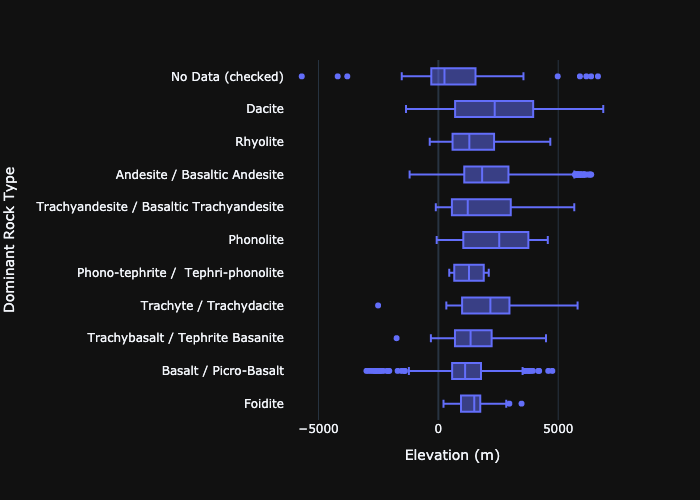

In [4]:
fig66 = px.box(data_frame=df_volcanoes, x='Elevation (m)', y='Dominant Rock Type')
fig66.show()


Whats the relationship between `Tectonic Setting` and `Dominant Rock Type`?

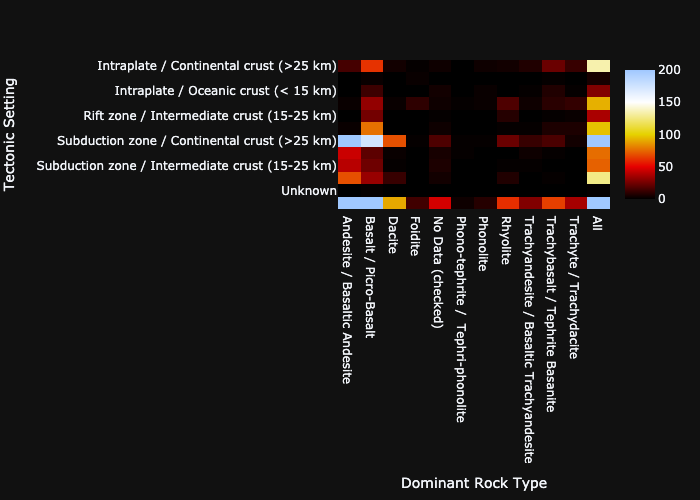

In [5]:
xt = pd.crosstab(index=df_volcanoes['Tectonic Setting'],columns=df_volcanoes['Dominant Rock Type'],margins=True)

fig = px.imshow(img=xt, aspect='auto', zmin=0, zmax=200, color_continuous_scale='blackbody')
fig.update_traces(
    zsmooth=None,
    hovertemplate='x: %{x}<br>y: %{y}<br>z: %{z:.3f}<extra></extra>'
)
fig.show()


---
### Read Pleistocene Volcanoes

In [ ]:
df_pleistocene_volcanoes = pd.read_csv('./data/volcanoes/GVP_Volcano_List_Pleistocene.csv')
df_pleistocene_volcanoes['Period'] = 'Pleistocene'
df_pleistocene_volcanoes.info()

In [ ]:
df_volcanoes = pd.concat([df_volcanoes,df_pleistocene_volcanoes])
df_volcanoes.info()

Fix some issues with missing values.

In [ ]:
mask = df_volcanoes['Dominant Rock Type'].isna()
df_volcanoes.loc[mask,'Dominant Rock Type'] = 'Unknown'

mask = df_volcanoes['Last Known Eruption'].isna()
df_volcanoes.loc[mask,'Last Known Eruption'] = 'Unknown'

---
### Download Earthquake data from USGS

We choose a date range and magnitude limit of interest, and then talk directly to the USGS database server to download the data. There are limits to the amount of data that can be downloaded at one time so we break it into chunks. 

In [ ]:
from datetime import date, timedelta
from datetime import datetime

#
# define minimum magnitude of interest:
#
min_magnitude = 4.2

#
# define a time window that starts 10 years ago and ends now:
#
download_date = datetime.now() 

last_date = download_date
first_date = last_date.replace(year=last_date.year - 5)

#
# download step size:
#
delta = timedelta(days=90)

In [ ]:
from urllib.parse import urlencode

#
# create an empty dataset to hold the download:
#
df_eq = pd.DataFrame()
total_events = 0

while last_date >= first_date:
    #
    # construct the time window for the current chunk:
    #
    end_str    = last_date.strftime("%Y-%m-%d")
    last_date -= delta
    start_str  = last_date.strftime("%Y-%m-%d")
    
    #
    # define the search parameters:
    #
    params = {
        'starttime': start_str+' 00:00:00',
        'endtime':     end_str+' 24:00:00',
        'minmagnitude': min_magnitude,
        'orderby': 'time'
    }

    #
    # encode the search parameters as a query string:
    #
    query = urlencode(params)

    #
    # get the chunk from the USGS database:
    #
    print('searching events from', start_str, 'to', end_str)
    df_query = pd.read_csv('https://earthquake.usgs.gov/fdsnws/event/1/query.csv?'+query)
    df_query = df_query[['depth','time','latitude','longitude','mag','place']]

    #
    # get number of events in this chunk and update the running total:
    #
    chunk_events = df_query.shape[0]
    total_events += chunk_events
    print('\tfound {chunk} (running total {total})'.format(total=total_events,chunk=chunk_events))

    #
    # append the latest chunk to the dataset:
    #
    df_eq = pd.concat((df_eq,df_query))

print('Total number of earthquakes:',total_events)
print('Data downloaded: ', download_date.strftime("%d %b %Y"))


Check what variables there are in the downloaded data.

In [ ]:
df_eq.info()

Let's see the first few records of the earthquake data.

In [ ]:
df_eq.head()

Convert the event times into a proper date/time representation.

In [ ]:
df_eq.time = pd.to_datetime(df_eq.time)

Report a statistical summary of the data.

In [ ]:
df_eq.describe(include='all',datetime_is_numeric=True).round(3)

Find the times of the first and last events.

In [ ]:
df_eq_start_time = df_eq.time.min().strftime('%d %b %Y')
df_eq_end_time = df_eq.time.max().strftime('%d %b %Y')
df_eq_download_date = download_date.strftime('%d %b %Y')

#df_eq.time = df_eq.time.dt.strftime("%Y-%m-%d")
df_eq.time = df_eq.time.dt.strftime("%d %B %Y, %H:%M:%S")

Store the earthquakes data to file just in case we want to use it again without doing the download.

In [ ]:
df_eq.to_csv('./data/earthquakes/usgs-latest-5yr.csv', index=False)

In [11]:
fig1 = px.histogram(data_frame = df_eq, x = 'mag', log_y=True, nbins=50)
fig1.show()


In [ ]:
show_scatter_3d = False

if show_scatter_3d:
    fig2 = px.scatter_3d(data_frame = df_eq, x = 'longitude', y = 'latitude', z = 'depth', size = 'mag')
    fig2.show(renderer='browser')


---
### Create map of plates, volcanoes, and earthquakes

Create an initial map (which starts out blank except for the underlying imagery) then progressively add data and style the cosmetics to build up the final product.

In [ ]:
#
# which layers are visible in the map:
#
show_plates      = True
show_boundaries  = True
show_orogens     = True
show_earthquakes = True
show_volcanoes   = True
show_pleistocene_volcanoes = True
show_attribution = True
show_watermark   = False

#
# define colour scales:
#
blank_colorscale = [[0, 'rgba(255,255,255,0.0)'], [1, 'rgba(255,255,255,0.0)']]
orogen_colorscale  = [[0, 'BurlyWood'], [1, 'BurlyWood']]
boundary_colorscale  = [[0, 'Yellow'], [1, 'Yellow']]

#
# create empty figure and add layers as appropriate:
#
fig = go.Figure()

if show_plates:
    fig.add_choroplethmapbox(geojson=plates,locations=df_plates.id,z=df_plates.id,
        name='Plates (after Bird, 2003)',
        colorscale=px.colors.qualitative.Light24*2,
        visible=True,
        marker_opacity=0.5,
        marker_line_width=0,
        marker_line_color='Yellow',
        showlegend=True,
        showscale=False,
        hovertext=df_plates.PlateName,
        hovertemplate='Plate: %{hovertext}<extra></extra>')

if show_boundaries:
    fig.add_choroplethmapbox(geojson=plates,locations=df_plates.id,z=df_plates.id,
        name='Plate boundaries',
        colorscale=boundary_colorscale,
        visible=True,
        marker_opacity=0,
        marker_line_width=0,
        marker_line_color='Yellow',
        showlegend=True,
        legendgroup='Boundaries',
        showscale=False,
        hovertext=df_plates.PlateName,
        hovertemplate='Plate: %{hovertext}<extra></extra>')

    fig.add_choroplethmapbox(geojson=plates,locations=df_plates.id,z=df_plates.id,
        name='Plate boundaries',
        colorscale=blank_colorscale,
        visible=True,
        marker_opacity=1,
        marker_line_width=1.0,
        marker_line_color='Yellow',
        showlegend=False,
        legendgroup='Boundaries',
        showscale=False,
        hovertext=df_plates.PlateName,
        hovertemplate='Plate: %{hovertext}<extra></extra>')

if show_orogens:
    fig.add_choroplethmapbox(geojson=orogens,locations=df_orogens.id,z=df_orogens.id,
        name='Orogens',
        colorscale=orogen_colorscale,
        visible=True,
        marker_opacity=0.5,
        marker_line_width=1.0,
        marker_line_color='white',
        showlegend=True,
        showscale=False,
        hovertext=df_orogens.Name,
        hovertemplate='Orogen: %{hovertext}<extra></extra>')

if show_earthquakes:
    name = '<br>Global Earthquakes<br>United States Geological Survey<br>{events} events M<sub>L</sub> > {mag}<br>{start} to {end}<br>'
    name = name.format(events=df_eq.shape[0],mag=min_magnitude,start=df_eq_start_time,end=df_eq_end_time)

#        z=df_eq.mag,

    fig.add_densitymapbox(name=name,lat=df_eq.latitude, lon=df_eq.longitude,
        z=df_eq.mag, 
        below='',
        colorscale='plasma',
        opacity=1.0,
        radius=5,        
        showlegend=True,
        showscale=False,
        customdata=df_eq,
        hovertemplate='Earthquake: %{customdata[5]}<br>Magnitude: %{z}<br>Depth: %{customdata[0]} km<br>Date: %{customdata[1]}<br>Coords: %{lon:.3f}&deg;E, %{lat:.3f}&deg;N<extra></extra>'
)

if show_volcanoes:
    df_volcanoes_display = df_volcanoes[['Volcano Name', 'Country', 'Primary Volcano Type', 'Elevation (m)', 'Last Known Eruption', 'Dominant Rock Type', 'Tectonic Setting', 'Period']]
    fig.add_scattermapbox(name='Global Volcanism<br>Holocene (< 11,650 years)<br>Pleistocene (< 2.5 million years)',lat=df_volcanoes.Latitude, lon=df_volcanoes.Longitude,
        marker_size=6,
        marker_color='orangered',
        customdata=df_volcanoes_display,
        hovertemplate='Volcano: <b>%{customdata[0]}</b><br>Country: %{customdata[1]}<br>Type: %{customdata[2]}<br>Period: %{customdata[7]}<br>Elevation: %{customdata[3]} m<br>Last known eruption: %{customdata[4]}<br>Dominant rock type: %{customdata[5]}<br>Tectonic setting: %{customdata[6]}<br>Coords: %{lon:.3f}&deg;E, %{lat:.3f}&deg;N<extra></extra>')

#
# attribution statement:
#
if show_attribution:
    fig.add_annotation(
            x=+0.05,
            y=+0.005,
            showarrow=False,
            text="Data sources:<br>Bird, P., 2003. An updated digital model of plate boundaries, <i>Geochem. Geophys. Geosyst.</i>, 4(3), 1027, doi:10.1029//2001GC00025<br>Contains information from <a href='https://github.com/fraxen/tectonicplates'>Hugo Ahlenius (nordpil.com)</a> which is made available under the <a href='https://opendatacommons.org/licenses/by/1.0/'>ODC Attribution License.</a><br>United States Geological Survey Earthquake Hazards Program. Downloaded {downloaded}. <a href='https://earthquake.usgs.gov/earthquakes/search/'>https://earthquake.usgs.gov/earthquakes/search/</a><br>Global Volcanism Program, 2013. Volcanoes of the World, v. 4.10.1. Venzke, E (ed.). Smithsonian Institution. Downloaded 8 Aug 2021. <a href='https://doi.org/10.5479/si.GVP.VOTW4-2013'>https://doi.org/10.5479/si.GVP.VOTW4-2013</a>".format(downloaded=df_eq_download_date),
            align='left',
            font_color='white',
            font_size=8,
            font_family='Arial',
            xref="paper",
            yref="paper",
            xanchor='left',
            yanchor='bottom'
    )

#
# watermark:
#
if show_watermark:
    fig.add_annotation(
        x=0.5,
        y=0.5,
        showarrow=False,
        text='analytic-signal/data-science',
        font_color='Gray',
        font_size=72,
        font_family='Futura',
        opacity=0.1,
        xref='paper',
        yref='paper',
    )

#
# choose the style of the underlying satellite/cultural imagery:
#
fig.update_layout(mapbox_style='satellite-streets', mapbox_accesstoken=token)

#
# margin - remove the figure margins so that the data fills the entire display area
# showlegend - make the legend visible
# legend_title_text - set a title for the legend
# legend_x, legend_y - set the legend position relative to bottom left corner of the figure; save space by positioning the legend inside the display area
#
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True,
    legend_title_text='Global Plate Tectonics,<br>Seismicity and Volcanism<br>',
    legend_title_font_color='white',
    legend_title_font_size=12,
    legend_title_font_family='Arial',
    legend_font_size=8,
    legend_bgcolor='rgba(0,0,0,0.5)',
    legend_xanchor='right',
    legend_x=1.0,
    legend_y=0.0
)

#
# display figure:
#
fig.show()

In [ ]:
fig.show(renderer='browser')

---
### Write map

Now that we have a finished map let's write it out.

In [ ]:
import os

if not os.path.exists('./figure-exports'):
    os.mkdir('./figure-exports')

fig.write_image('./figure-exports/global-plate-tectonics-10yr.png',scale=4)
fig.write_html('./figure-exports/global-plate-tectonics-10yr.html')
fig.write_json('./figure-exports/global-plate-tectonics-10yr.json')

---  
GitHub repository: https://github.com/analyticsignal/dynamic-planet.git  
Copyright &copy; 2020-2023 Analytic Signal Limited, all rights reserved